<a href="https://colab.research.google.com/github/giauhuynh2002/HuynhPhatGiau-20104026/blob/main/Nhan_dien_Tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [93]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT AI/Money/Train',target_size=(128,128), batch_size=32, class_mode='categorical')

Found 976 images belonging to 11 classes.


In [94]:
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT AI/Money/Test',target_size=(128,128), batch_size=32, class_mode='categorical')


Found 433 images belonging to 11 classes.


In [95]:
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [96]:
test_set.class_indices


{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [97]:
x_train = np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train = np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(976, 128, 128, 3)
(976, 11)


In [98]:
x_test = np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(433, 128, 128, 3)
(433, 11)


In [99]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128,128,3), padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 16, 16, 128)     

In [100]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])
money=model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
31/31 [==============================] - 34s 1s/step - loss: 2.4362 - accuracy: 0.0891
Epoch 2/100
31/31 [==============================] - 35s 1s/step - loss: 2.4003 - accuracy: 0.0932
Epoch 3/100
31/31 [==============================] - 35s 1s/step - loss: 2.3978 - accuracy: 0.0932
Epoch 4/100
31/31 [==============================] - 35s 1s/step - loss: 2.3960 - accuracy: 0.1117
Epoch 5/100
31/31 [==============================] - 35s 1s/step - loss: 2.3635 - accuracy: 0.1486
Epoch 6/100
31/31 [==============================] - 35s 1s/step - loss: 2.2489 - accuracy: 0.2111
Epoch 7/100
31/31 [==============================] - 35s 1s/step - loss: 2.0584 - accuracy: 0.2910
Epoch 8/100
31/31 [==============================] - 35s 1s/step - loss: 1.7841 - accuracy: 0.3975
Epoch 9/100
31/31 [==============================] - 33s 1s/step - loss: 1.3925 - accuracy: 0.5246
Epoch 10/100
31/31 [==============================] - 38s 1s/step - loss: 1.0651 - accuracy: 0.6568
Epoch 11/

In [101]:
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 2.5210658350260928e-05
Train Accuracy 1.0


In [102]:
model.save("Money.h5")

In [103]:
model_ANN=load_model('Money.h5')

In [104]:
class_names = ["100.000 VND","10.000 VND","1.000 VND","200.000 VND","200 VND","20.000 VND","2.000 VND","500.000 VND","500 VND","50.000 VND","5.000 VND"]

1/1 [==============================] - 0s 31ms/step
[[5.46505575e-18 2.36600684e-20 7.64136732e-01 1.05835694e-10
  1.37216125e-06 1.28830870e-04 1.07464693e-09 5.14159501e-23
  2.35733122e-01 7.67923680e-09 5.95290317e-10]]
Kết quả:  1.000 VND
Độ chính xác:  0.76413673


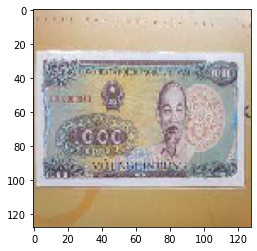

In [132]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/Colab Notebooks/BT AI/Money/Test/1K/image27.jpeg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128, 128, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 29ms/step
[[5.81876980e-03 3.97050753e-02 3.97993543e-04 3.17296833e-01
  3.89816193e-03 3.21241949e-08 3.09937718e-07 6.32880509e-01
  2.27401597e-06 3.71948436e-12 1.22389885e-08]]
Kết quả:  500.000 VND
Độ chính xác:  0.6328805


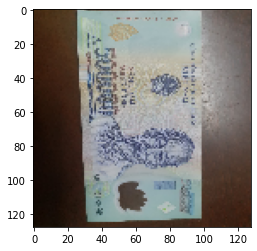

In [116]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/Colab Notebooks/BT AI/Money/Test/500K/2044668abecc7e9227dd194.jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128, 128, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 29ms/step
[[9.8761499e-01 1.5997500e-03 3.5197304e-03 2.3491583e-03 2.0204268e-03
  1.0635429e-03 2.7394087e-06 7.3452585e-04 3.8970620e-06 1.0548352e-03
  3.6463844e-05]]
Kết quả:  100.000 VND
Độ chính xác:  0.987615


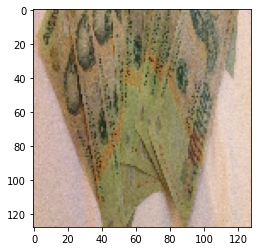

In [138]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/Colab Notebooks/BT AI/Money/Test/100K/Image_97.jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128, 128, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

1/1 [==============================] - 0s 29ms/step
[[3.7682240e-04 1.0402230e-08 1.1756720e-05 4.4996692e-03 5.4476981e-04
  8.8183262e-04 2.4325887e-04 1.1774520e-03 1.7448260e-04 5.4077065e-04
  9.9154913e-01]]
Kết quả:  5.000 VND
Độ chính xác:  0.99154913


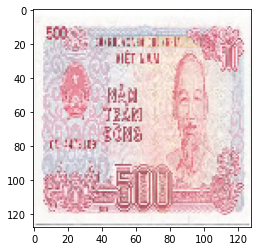

In [142]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/Colab Notebooks/BT AI/Money/Test/500d/C490E1BB93ng_bE1BAA1c_500_C491E1BB93ng.jpg"
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128, 128, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)